In [1]:
import math 
import numpy as np
import numpy.random as npr
from pylab import plt,mpl

In [2]:
plt.style.use('seaborn')
mpl.rcParams['font.family']='serif'
%matplotlib inline

C:\Users\matty\AppData\Local\Temp\ipykernel_10144\1919144535.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [3]:
npr.seed(100)
np.set_printoptions(precision=4)

In [4]:
npr.rand(30);


In [5]:
npr.rand(5,5)

array([[0.5988, 0.6038, 0.1051, 0.3819, 0.0365],
       [0.8904, 0.9809, 0.0599, 0.8905, 0.5769],
       [0.7425, 0.6302, 0.5818, 0.0204, 0.21  ],
       [0.5447, 0.7691, 0.2507, 0.2859, 0.8524],
       [0.975 , 0.8849, 0.3595, 0.5989, 0.3548]])

In [6]:
a=5
b=10
npr.rand(10)*(b-a)+a

array([6.701 , 5.8904, 6.1885, 5.2243, 7.5272, 6.8813, 7.964 , 8.1497,
       5.713 , 9.6692])

In [7]:
npr.rand(5,5)*(b-a)+a

array([[9.7319, 8.0115, 6.9388, 6.8159, 6.0217],
       [6.3838, 6.2327, 5.868 , 9.833 , 9.7851],
       [7.9899, 8.6565, 6.7019, 5.4603, 7.3175],
       [7.5435, 5.4423, 7.6402, 9.9608, 6.9752],
       [6.678 , 9.0273, 8.7717, 6.5653, 8.1702]])

In [8]:
sample_size=500
rn1=npr.rand(sample_size,3)
rn2=npr.randint(0,10,sample_size)
a=[0,25,50,75,100]
rn4=npr.choice(a,size=sample_size)

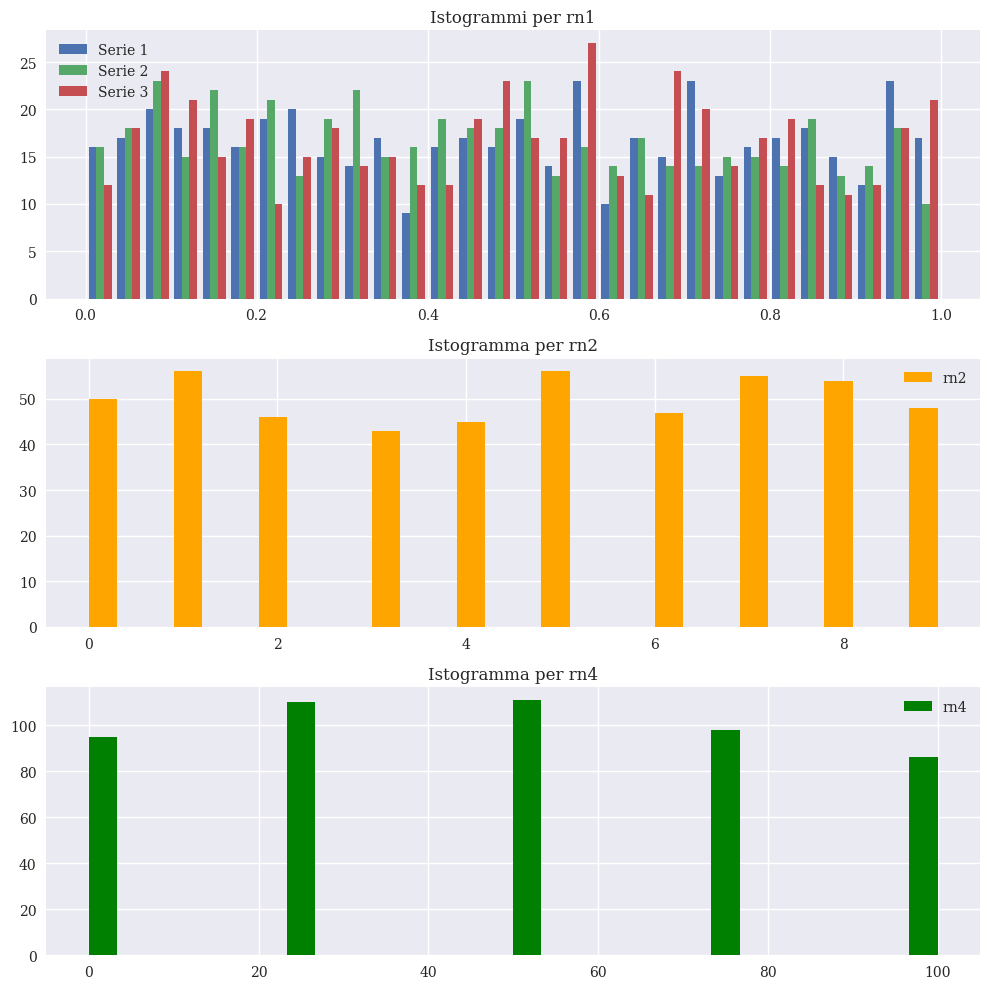

In [9]:
fig, axs = plt.subplots(3, figsize=(10, 10))

# Crea un istogramma per ogni serie di dati
axs[0].hist(rn1, bins=30, label=['Serie 1', 'Serie 2', 'Serie 3'])
axs[1].hist(rn2, bins=30, color='orange', label='rn2')
axs[2].hist(rn4, bins=30, color='green', label='rn4')

# Imposta i titoli e le legende
axs[0].set_title('Istogrammi per rn1')
axs[0].legend()
axs[1].set_title('Istogramma per rn2')
axs[1].legend()
axs[2].set_title('Istogramma per rn4')
axs[2].legend()

# Mostra la figura
plt.tight_layout()
plt.show()

In [10]:
sample_size=500
rn1=npr.standard_normal(sample_size)
rn2=npr.normal(100,20,sample_size)
rn3=npr.chisquare(df=0.5,size=sample_size)
rn4=npr.poisson(lam=1.0,size=sample_size)

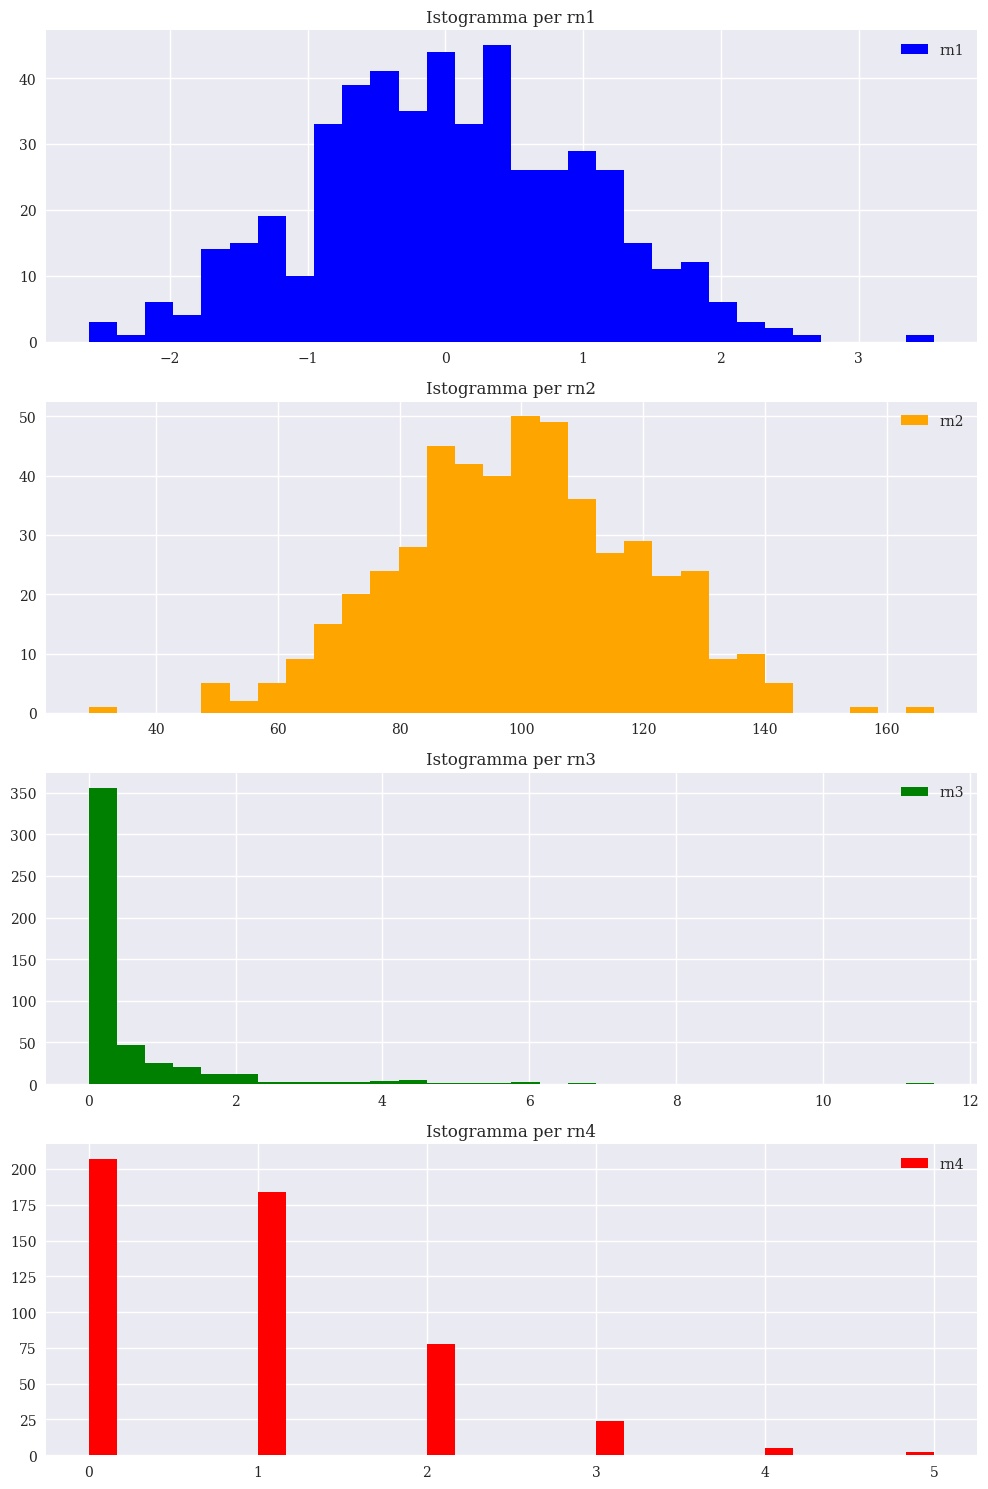

In [11]:
fig, axs = plt.subplots(4, figsize=(10, 15))

# Crea un istogramma per ogni serie di dati
axs[0].hist(rn1, bins=30, color='blue', label='rn1')
axs[1].hist(rn2, bins=30, color='orange', label='rn2')
axs[2].hist(rn3, bins=30, color='green', label='rn3')
axs[3].hist(rn4, bins=30, color='red', label='rn4')

# Imposta i titoli e le legende
axs[0].set_title('Istogramma per rn1')
axs[0].legend()
axs[1].set_title('Istogramma per rn2')
axs[1].legend()
axs[2].set_title('Istogramma per rn3')
axs[2].legend()
axs[3].set_title('Istogramma per rn4')
axs[3].legend()

# Mostra la figura
plt.tight_layout()
plt.show()

In [12]:
import pandas as pd


In [13]:

pd.set_option("display.max_rows",100000)
S0=100
r=0.05
sigma=0.25
T=2.0
I=10000

ST1=S0*np.exp((r-0.5*sigma**2)*T+sigma*np.sqrt(T)*npr.standard_normal(I))

In [14]:
ST1

array([ 92.1677,  72.7262,  41.8241, ...,  55.8944,  70.8699, 135.3125])

Text(0, 0.5, 'frequency')

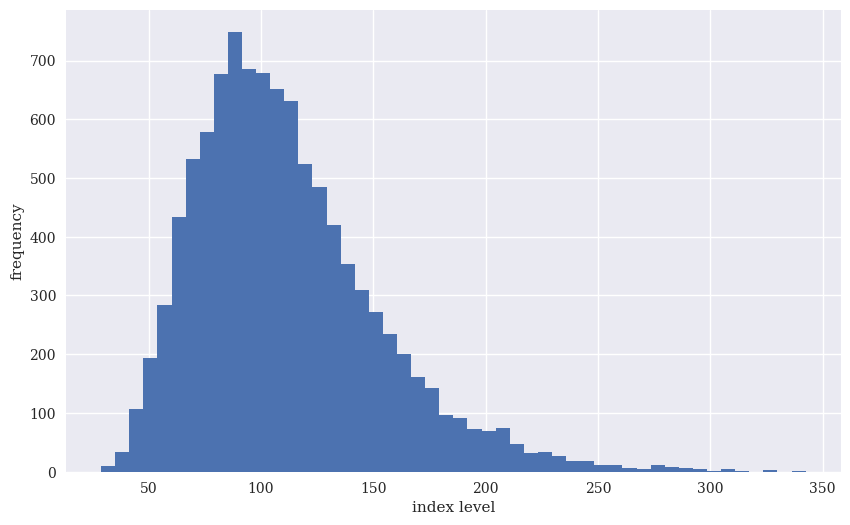

In [15]:
plt.figure(figsize=(10,6))
plt.hist(ST1,bins=50)
plt.xlabel('index level')
plt.ylabel('frequency')

In [16]:
ST2=S0*npr.lognormal((r-0.5*sigma**2)*T, sigma*np.sqrt(T),size=I)

Text(0, 0.5, 'frequency')

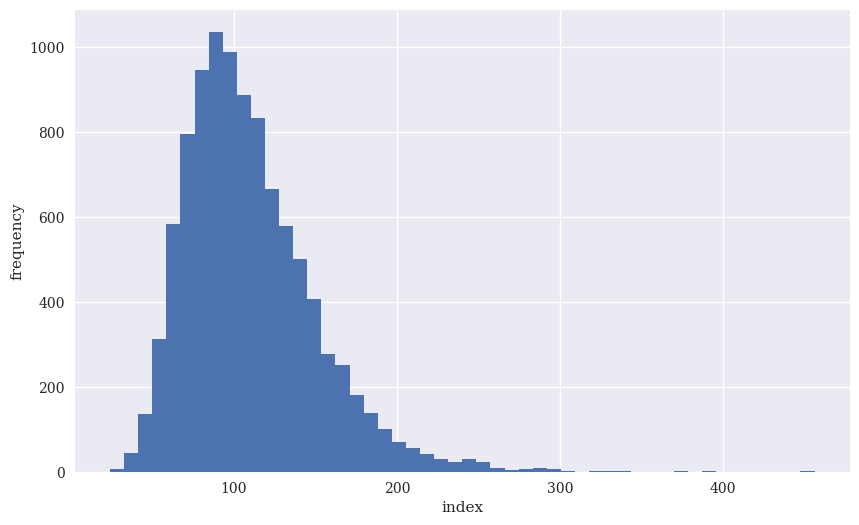

In [17]:
plt.figure(figsize=(10,6))
plt.hist(ST2,bins=50)
plt.xlabel('index')
plt.ylabel('frequency')

In [18]:
import scipy.stats as scs

In [19]:
T=2.0
S0=100
I=10000
M=50
dt=T/M
S=np.zeros((M+1,I))
np.set_printoptions(threshold=np.inf)
S[0]=S0
for t in range(1,M+1):
    S[t]=S[t-1]*np.exp((r-0.5*sigma**2)*dt+sigma*np.sqrt(dt)*npr.standard_normal(I))

Text(0, 0.5, 'frequency')

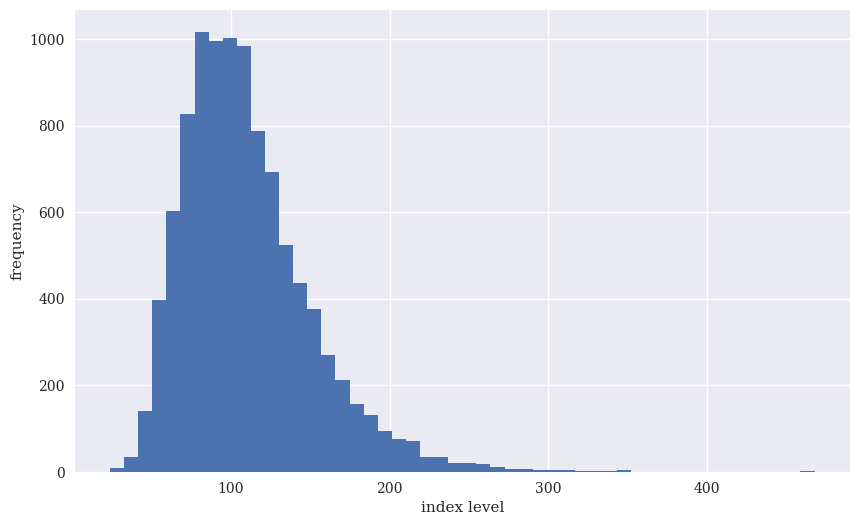

In [20]:
plt.figure(figsize=(10,6))
plt.hist(S[-1],bins=50)
plt.xlabel('index level')
plt.ylabel('frequency')

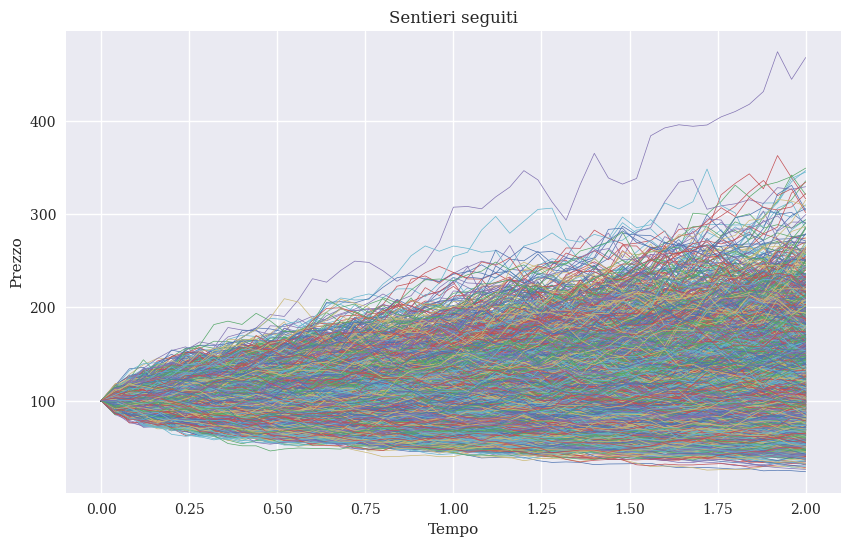

In [21]:
plt.figure(figsize=(10, 6))
for i in range(I):  # Visualizza solo 10 sentieri per chiarezza
    plt.plot(np.arange(M + 1) * dt, S[:, i], lw=0.5)

plt.xlabel('Tempo')
plt.ylabel('Prezzo')
plt.title('Sentieri seguiti')
plt.grid(True)
plt.show()

In [22]:
x0=0.05
K=3.0
theta=0.02
sigma=0.1
I=10000
M=50
dt=T/M

def srd_euler():
    xh=np.zeros((M+1,I))
    x=np.zeros_like(xh)
    xh[0]=x0
    x[0]=x0
    for t in range(1,M+1):
        xh[t]=(xh[t-1]+K*(theta-np.maximum(xh[t-1],0))*dt+sigma*np.sqrt(np.maximum(xh[t-1],0))*math.sqrt(dt)
               *npr.standard_normal(I))
    x=np.maximum(xh,0)
    return x
x1=srd_euler()

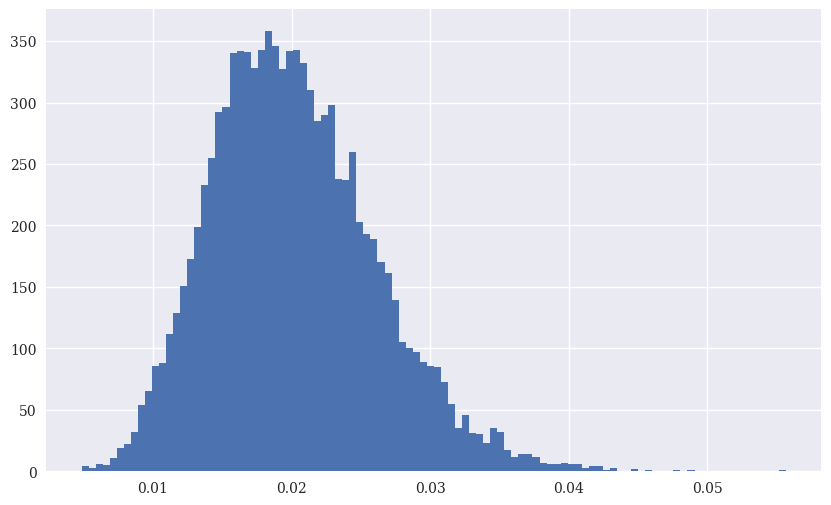

In [23]:
plt.figure(figsize=(10,6))
plt.hist(x1[-1],bins=100);

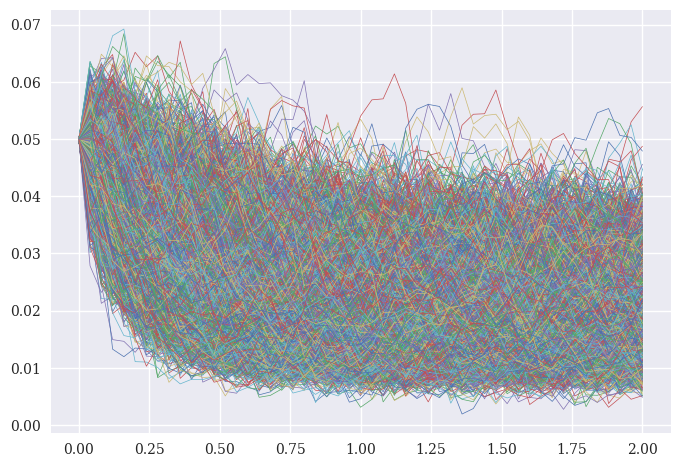

In [24]:
plt.plot(figsize=(10,6))
for i in range(I):
    plt.plot(np.arange(M+1)*dt,x1[:,i],lw=0.5)
    
    

In [25]:
def srd_exact():
     x=np.zeros((M+1,I))
     x[0]=x0
     for t in range(1,M+1):
        df=4*theta*K/sigma**2
        c=(sigma**2*(1-np.exp(-K*dt)))/(4*K)
        nc=np.exp(-K*dt)/c*x[t-1]
        x[t]=c*npr.noncentral_chisquare(df,nc,size=I)
     return x

x2=srd_exact()
   

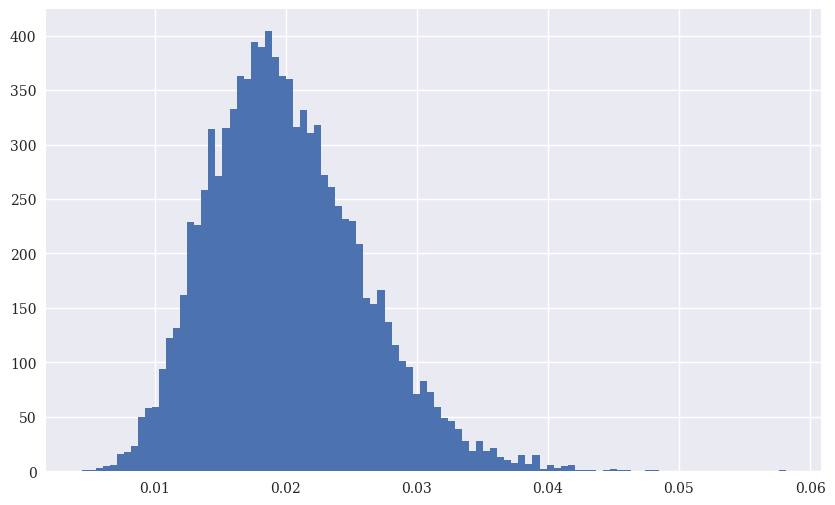

In [26]:
plt.figure(figsize=(10,6))
plt.hist(x2[-1],bins=100);

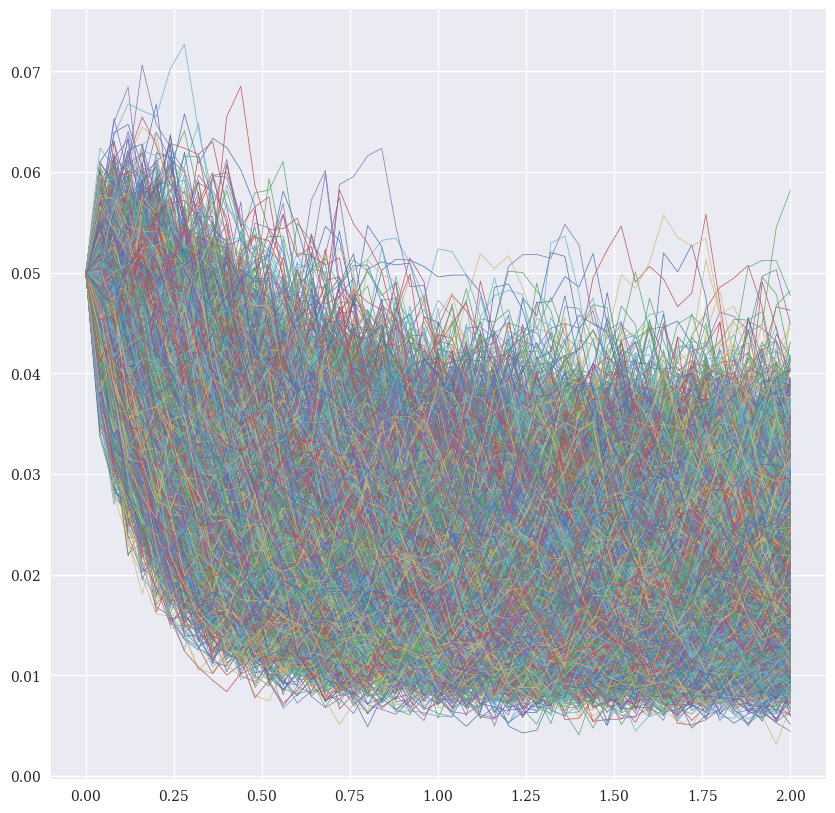

In [27]:
plt.figure(figsize=(10,10))
for i in range(i):
    plt.plot(np.arange(M+1)*dt,x2[:,i],lw=0.5)

In [28]:
S0=100
r=0.05
v0=0.1
K=3.0
theta=0.25
sigma=0.1
rho=0.6
T=1.0


In [29]:
corr_mat=np.zeros((2,2))
corr_mat[0,:]=[1.0,rho]
corr_mat[1,:]=[rho,1.0]
cho_mat=np.linalg.cholesky(corr_mat)


In [30]:
cho_mat

array([[1. , 0. ],
       [0.6, 0.8]])

In [31]:
M=50
I=10000
dt=T/M

In [32]:
ran_num=npr.standard_normal((2,M+1,I))

In [33]:
v=np.zeros_like(ran_num[0])
vh=np.zeros_like(v)


In [34]:
v[0]=v0
vh[0]=v0

In [35]:
for t in range(1,M+1):
    ran = np.dot(cho_mat,ran_num[:,t,:]) 
    vh[t]=(vh[t-1]+K*(theta-np.maximum(vh[t-1],0))*dt+sigma*np.sqrt(np.maximum(vh[t-1],0))*math.sqrt(dt)*ran[1])

    
v=np.maximum(vh,0)

In [36]:
S=np.zeros_like(ran_num[0])
S[0]=S0
for t in range(1,M+1):
    ran=np.dot(cho_mat,ran_num[:,t,:])
    S[t]=S[t-1]*np.exp((r-0.5*v[t])*dt+np.sqrt(v[t])*ran[0]*np.sqrt(dt))
    

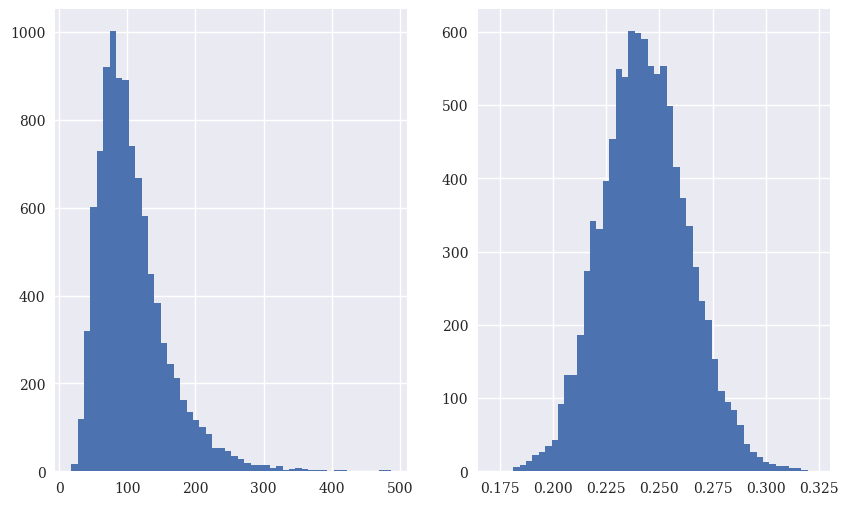

In [37]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,6))
ax1.hist(S[-1],bins=50);
ax2.hist(v[-1],bins=50);

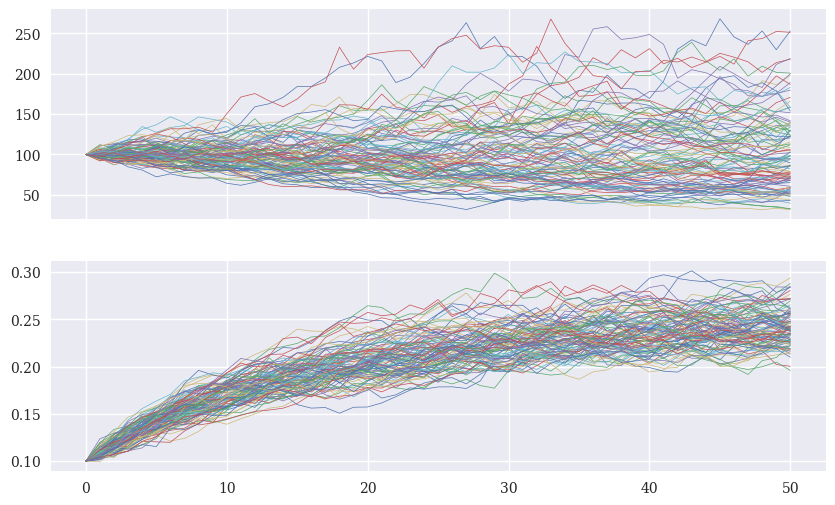

In [38]:
fig,(ax1,ax2)=plt.subplots(2,1,sharex=True,figsize=(10,6))
for i in range(100):
    ax1.plot(S[:,i],lw=0.5)
    ax2.plot(v[:,i],lw=0.5)

In [39]:
S0=100
r=0.05
sigma=0.2
lamb=0.75
mu=-0.6
delta=0.25
rj= lamb*(math.exp(mu+0.5*delta**2)-1)
T=1.0
M=50
I=10000
dt=T/M

S=np.zeros((M+1,I))
S[0]=S0
sn1=npr.standard_normal((M+1,I))
sn2=npr.standard_normal((M+1,I))
poi=npr.poisson(lamb*dt,(M+1,I))
for t in range(1,M+1,1):
    S[t]=S[t-1]*(np.exp((r-rj-0.5*sigma**2)*dt+sigma*math.sqrt(dt)*sn1[t])+(np.exp(mu+delta*sn2[t])-1)*poi[t])
    S[t]=np.maximum(S[t],0)

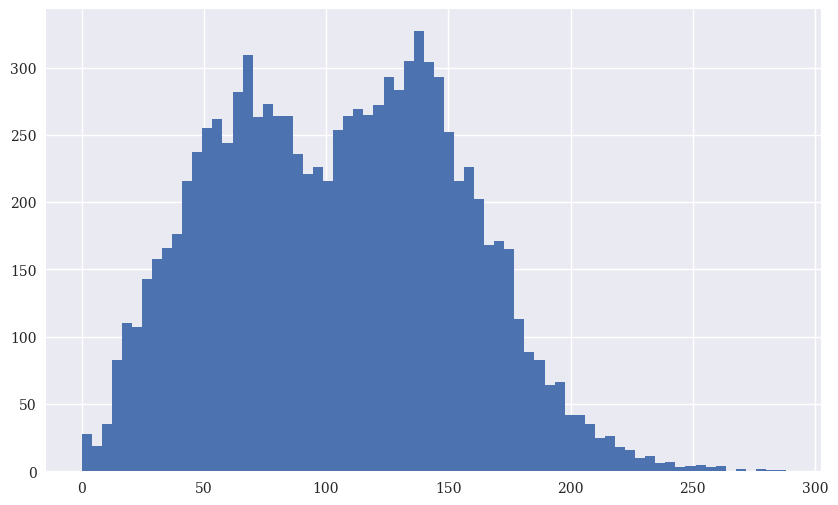

In [40]:
plt.figure(figsize=(10,6))
plt.hist(S[-1],bins=70);

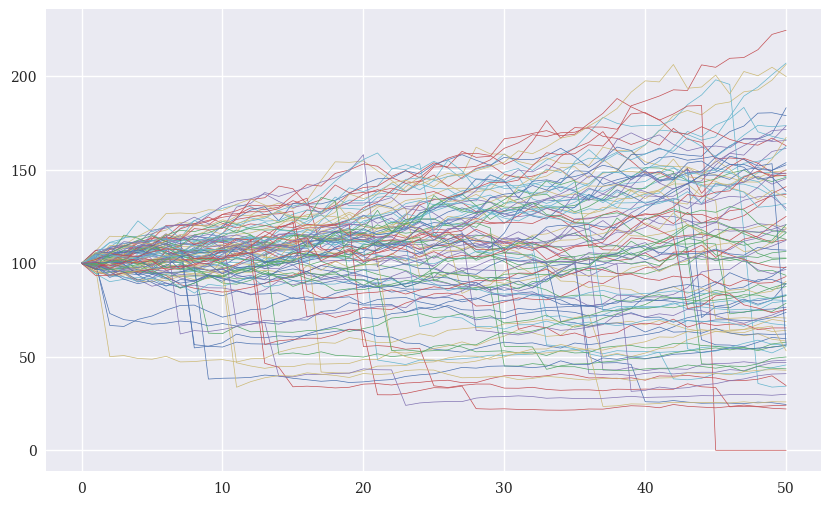

In [41]:
plt.figure(figsize=(10,6))
for i in range(100):
    plt.plot(S[:,i],lw=0.5)

# variance reduction


In [43]:
sn=npr.standard_normal(int(10000/2))
sn=np.concatenate((sn,-sn))
sn

array([-9.4345e-01,  7.8870e-01,  1.8769e+00, -6.1423e-01, -1.2772e+00,
        1.3454e+00,  8.1354e-01, -5.7075e-01, -1.7020e+00, -8.7514e-02,
       -3.1251e-01,  2.7720e-01, -1.5591e-01,  4.0344e-02,  1.3862e-01,
       -1.5158e+00,  1.0821e+00, -1.5935e+00,  5.5499e-01, -2.7608e-01,
        5.7533e-01,  5.8065e-02, -1.1816e+00,  1.0849e+00, -1.4905e-01,
        5.2624e-01,  1.8411e+00, -7.3440e-01, -2.0261e+00,  4.0123e-01,
       -1.6227e+00, -4.4928e-01,  1.0573e+00,  2.1973e-01,  1.8219e+00,
       -3.8772e-02,  7.9976e-01,  8.3159e-01, -1.0097e+00,  8.8978e-01,
        9.6957e-01, -3.6734e-01, -1.3675e-02,  2.1861e-01, -9.1942e-02,
        9.1345e-01, -6.9505e-01, -5.9598e-01, -1.8348e-01,  8.1996e-02,
       -1.9827e+00, -6.7604e-01, -4.8399e-01, -3.0483e-01, -4.0872e-01,
       -8.8175e-01, -5.6909e-01,  1.0504e+00,  4.3512e-01,  4.1455e-01,
        1.0158e-01,  2.4575e-01, -2.4289e-01,  2.0448e-01,  3.1975e-01,
        4.0879e-01, -2.4188e+00,  2.6825e-01,  9.2571e-02, -5.47

In [44]:
np.shape(sn)

(10000,)

In [45]:
sn.mean()

-1.4210854715202004e-18

In [46]:
sn=npr.standard_normal(10000)
sn.mean()

0.015905264683278922

In [47]:
sn.std()

1.0122624292412161

In [48]:
sn_new=(sn-sn.mean())/sn.std()

In [49]:
sn_new.mean()

1.2079226507921702e-17

In [50]:
sn_new.std()

1.0

In [64]:
def gen_sn(M,I,anti_paths=True,mo_match=True):
    '''Function to generate random numbers for simulation.
    
    Parameters
    ==========
    M:int 
       number of time intervals for discretization
    I:int 
       number of paths to be simulated
    anti_paths:boolean 
         use of antithetic variates
    mo_math: boolean
         use of moment matching
    '''
    if anti_paths is True:
        sn=npr.standard_normal((M+1,int(I/2)))
        sn=np.concatenate((sn,-sn),axis=1)
    else:
        sn=npr.standard_normal((M+1,I))
    if mo_match is True:
        sn=(sn-sn.mean())/sn.std()
    return sn

In [65]:
S0=100
r=0.05
sigma=0.25
T=1.0
I=50000

In [69]:
def gbm_mcs_stat(k):
    '''Valuation of European call option in Black-Sholes-Merton by Monte Carlo simulation (of index level at maturity)
    Parameters
    ==========
    k:float
       (positive) strike price of the option
    Returns
    =======
    C0: float
        estimated present value of European call option
    '''
    sn=gen_sn(1,I)
    # simulate index level at maturity
    ST=S0*np.exp((r-0.5*sigma**2)*T+sigma*math.sqrt(T)*sn[1])
    #calculate payoff at maturity
    hT=np.maximum(ST-k,0)
    #calculate MCS estimator
    C0=math.exp(-r*T)*np.mean(hT)
    return C0

In [74]:
gbm_mcs_stat(k=105.)

10.096045284543393

In [75]:
M=50

In [78]:
def gbm_mcs_dyna(K,option='call'):
    '''Simulation B-S-M
    Parameters
    ==========
    K:float
    option:sting
        ('call,'put)
    Returns
    =======
    C0:floar
    '''
    dt=T/M
    #simulation of index poaths
    S=np.zeros((M+1,I))
    S[0]=S0
    sn=gen_sn(M,I)
    for t in range(1,M+1):
        S[t]=S[t-1]*np.exp((r-0.5*sigma**2)*dt+sigma*math.sqrt(dt)*sn[t])
    #case-based calculation od payoff
    if option =='call':
        hT=np.maximum(S[-1]-K,0)
    else:
        hT=np.maximum(K-S[-1],0)
    #calculation of MCS estimator
    C0=math.exp(-r*T)*np.mean(hT)
    return C0

In [80]:
gbm_mcs_dyna(K=110.,option='call')

8.16534560057663

In [81]:
gbm_mcs_dyna(K=110.,option='put')

12.63784726960311

In [82]:
 def gbm_mcs_amer(K,option='call'):
    '''Simulation LSM
    Parameters
    ==========
    K:float
    option:string
        ('call','put')
    Returns
    =======
    C0:float
    '''
    dt=T/M
    df=math.exp(-r*dt)
    #simulation of index poaths
    S=np.zeros((M+1,I))
    S[0]=S0
    sn=gen_sn(M,I)
    for t in range(1,M+1):
        S[t]=S[t-1]*np.exp((r-0.5*sigma**2)*dt+sigma*math.sqrt(dt)*sn[t])
    #case-based calculation od payoff
    if option =='call':
        h=np.maximum(S-K,0)
    else:
        hT=np.maximum(K-S,0)
    #algoritmo LSM
    V=np.copy(h)
    for t in range(M-1,0,-1):
        reg=np.polyfit(S[t],V[t+1]*df,7)
        C=np.polyval(reg,S[t])
        V[t]=np.where(C>h[t],V[t+1]*df,h[t])
    #calculation of MCS estimator
    C0=df*np.mean(V[1])
    return C0

In [84]:
gbm_mcs_amer(K=110.,option='call')

7.822274311260337

In [94]:
S0=100
r=0.05
sigma=0.25
T=30/252
I=10000


In [95]:
ST=S0*np.exp((r-0.5*sigma**2)*T+sigma*np.sqrt(T)*npr.standard_normal(I))


In [96]:
R_gbm=np.sort(ST-S0)

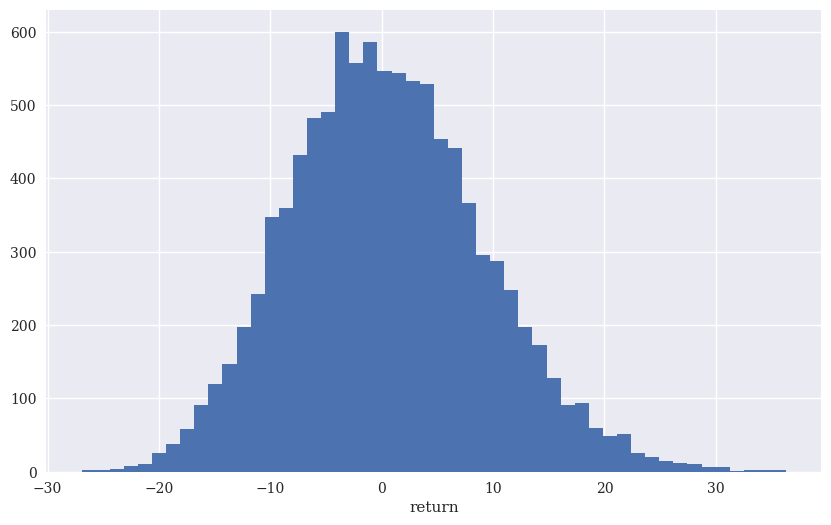

In [97]:
plt.figure(figsize=(10,6))
plt.hist(R_gbm,bins=50);
plt.xlabel('return');

In [98]:
percs=[0.01,0.1,1,2.5,5.0,10.0]
var=scs.scoreatpercentile(R_gbm,percs)
print('%16s %16s' % ('Confidence Level' , 'VAR'))
print(33*'_')
for pair in zip(percs,var):
    print('%16.2f %16.3f' % (100-pair[0],-pair[1]))

Confidence Level              VAR
_________________________________
           99.99           26.012
           99.90           23.004
           99.00           17.867
           97.50           15.443
           95.00           13.095
           90.00           10.300


In [100]:
def bsm_call_value(S0,K,T,r,sigma):
    from math import log,sqrt,exp
    from scipy import stats
    S0=float(S0)
    d1=(log(S0/K)+(r+0.5*sigma**2)*T)/(sigma*sqrt(T))
    d2=(log(S0/K)+(r-0.5*sigma**2)*T)/(sigma*sqrt(T))
    value=(S0*stats.norm.cdf(d1,0.0,1.0)-K*exp(-r*T)*stats.norm.cdf(d2,0.0,1.0))
    return value


In [ ]:
def bsm_vega(S0,K,T,r,sigma):
    from math import log,sqrt,exp
    from scipy import stats
    
                 
    